In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
sample = cv2.imread('sample.jpg', 0)
print(sample.shape)

(106, 884)


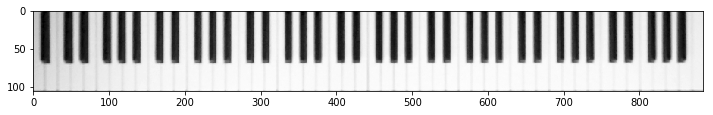

In [23]:
plt.figure(figsize=(12, 24))
plt.imshow(sample, 'gray')

In [35]:
blur = cv2.GaussianBlur(sample, (5, 5), 0)
_, bw = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)

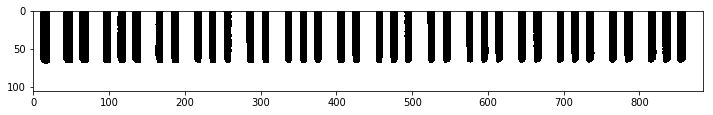

In [36]:
plt.figure(figsize=(12, 24))
plt.imshow(bw, 'gray')

In [42]:
upper = np.mean(bw[0:5], axis=0)

In [73]:
black_keys = []

last = -1

for i, x in enumerate(upper):
    if x <= 255 / 5:
        if last == -1:
            last = i
    else:
        if last != -1:
            black_keys.append((last, i - 1))
            last = -1
            
print(len(black_keys)) # should be 36

36


In [80]:
expected_width = 20

for i, (x, y) in enumerate(black_keys):
    offset = (expected_width - (y - x + 1)) // 2
    black_keys[i] = (x - offset, y + offset)

In [81]:
black_keys = np.array(black_keys)

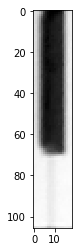

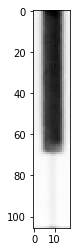

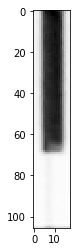

In [82]:
ind = [2, 24, 27]
for index in ind:
    plt.imshow(sample[:, black_keys[index][0]: black_keys[index][1]], 'gray')
    plt.show()

In [ ]:
def get_black_keys(img, expected_width=20):
    '''
    want a grayscale image, (h, w) format
    '''
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, bw = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)
    upper = np.mean(bw[0:5], axis=0)
    
    black_keys = []

    last = -1

    for i, x in enumerate(upper):
        if x <= 255 / 5:
            if last == -1:
                last = i
        else:
            if last != -1:
                black_keys.append((last, i - 1))
                last = -1

    for i, (x, y) in enumerate(black_keys):
        offset = (expected_width - (y - x + 1)) // 2
        black_keys[i] = (x - offset, y + offset)
        
    black_keys = np.array(black_keys)
    
    return black_keys